In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV files (update paths as needed)
train_operational = pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\2024-34-2\data\train_operational_readouts.csv")
train_tte = pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\2024-34-2\data\train_tte.csv")
train_specifications = pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\2024-34-2\data\train_specifications.csv")


print("Analysis Complete! Consider further insights like clustering, anomaly detection, or predictive modeling.")

Analysis Complete! Consider further insights like clustering, anomaly detection, or predictive modeling.



Train Operational Readouts Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122452 entries, 0 to 1122451
Columns: 107 entries, vehicle_id to 397_35
dtypes: float64(106), int64(1)
memory usage: 916.3 MB
None
         vehicle_id     time_step         171_0         666_0         427_0  \
count  1.122452e+06  1.122452e+06  1.122452e+06  1.122412e+06  1.116047e+06   
mean   1.563501e+04  1.426336e+02  3.432285e+06  1.220519e+05  1.297269e+08   
std    9.802149e+03  9.529169e+01  2.766660e+06  1.441444e+05  1.005308e+08   
min    0.000000e+00  0.000000e+00  1.500000e+01  0.000000e+00  6.050000e+02   
25%    6.726000e+03  6.640000e+01  1.288320e+06  2.970375e+04  5.180904e+07   
50%    1.578300e+04  1.278000e+02  2.781472e+06  7.645500e+04  1.080906e+08   
75%    2.354200e+04  2.060000e+02  4.949614e+06  1.620980e+05  1.853690e+08   
max    3.364300e+04  5.074000e+02  3.048960e+07  5.886459e+06  1.046455e+09   

              837_0         167_0         167_1         167_2         16

MemoryError: Unable to allocate 3.58 GiB for an array with shape (1122452, 107, 4) and data type float64

<Figure size 1200x600 with 1 Axes>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17696\700252934.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='in_study_repair', data=train_tte, palette='coolwarm')


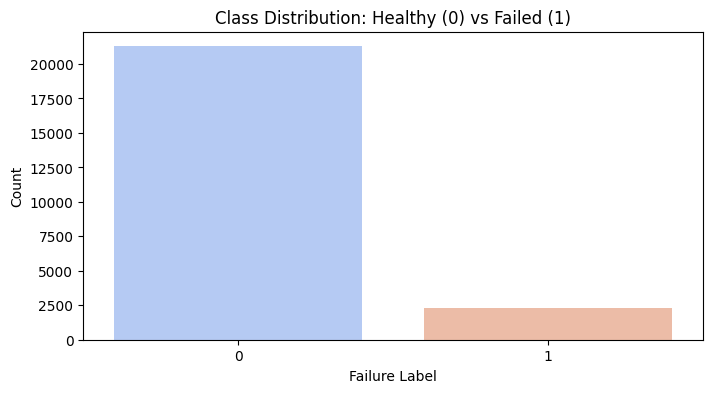

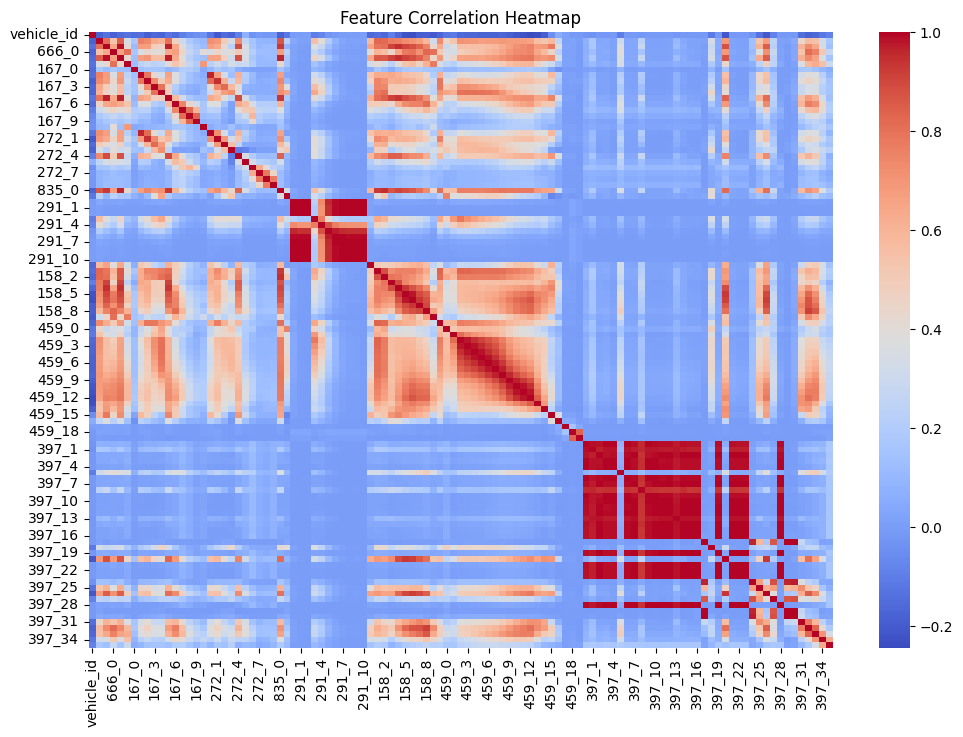

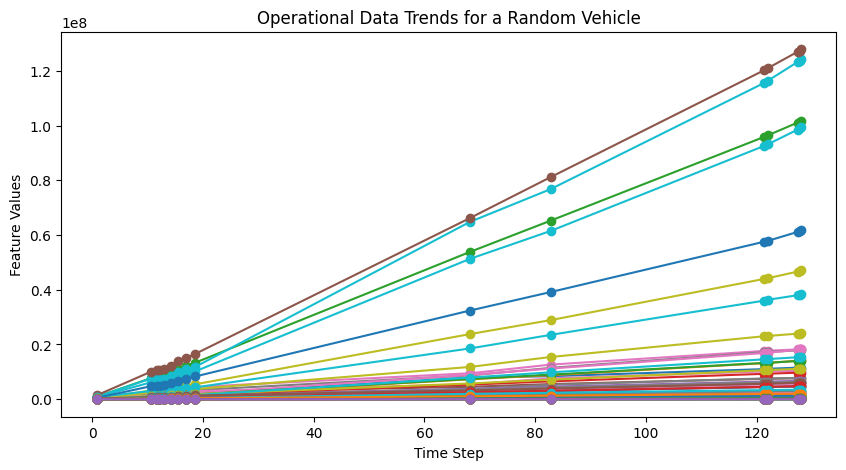

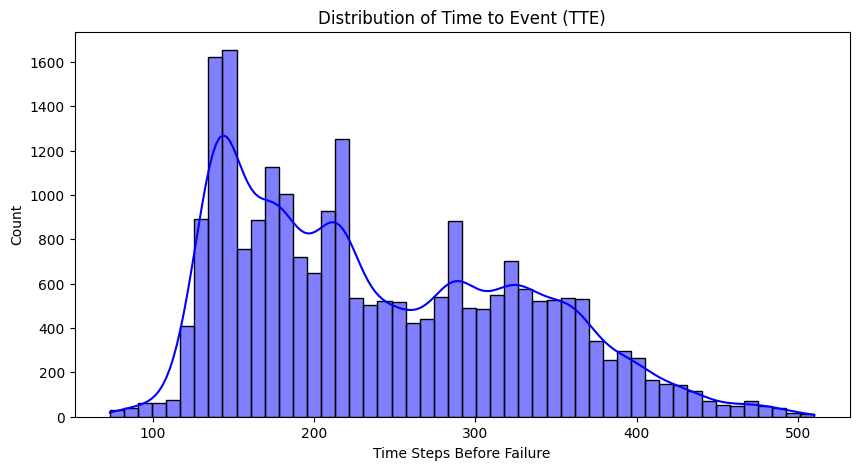

In [3]:
# Basic information
def basic_info(df, name):
    print(f"\n{name} Info:")
    print(df.info())
    print(df.describe())
    print("Missing values per column:")
    print(df.isnull().sum())

# Run basic info
basic_info(train_operational, "Train Operational Readouts")
basic_info(train_tte, "Train TTE")
basic_info(train_specifications, "Train Specifications")

# Visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(train_operational.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap - Operational Readouts")
plt.show()

# Class distribution in train_tte
plt.figure(figsize=(8,4))
sns.countplot(x='in_study_repair', data=train_tte, palette='coolwarm')
plt.title("Class Distribution: Healthy (0) vs Failed (1)")
plt.xlabel("Failure Label")
plt.ylabel("Count")
plt.show()

# Feature correlation heatmap (for numerical counters only)
numeric_features = train_operational.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_features.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Time series trend example (random vehicle)
random_vehicle = train_operational[train_operational['vehicle_id'] == train_operational['vehicle_id'].sample(1).values[0]]
plt.figure(figsize=(10,5))
plt.plot(random_vehicle['time_step'], random_vehicle.iloc[:,2:], marker='o')
plt.xlabel("Time Step")
plt.ylabel("Feature Values")
plt.title("Operational Data Trends for a Random Vehicle")
plt.show()

# Repair event timeline
plt.figure(figsize=(10,5))
sns.histplot(train_tte['length_of_study_time_step'], bins=50, kde=True, color='blue')
plt.title("Distribution of Time to Event (TTE)")
plt.xlabel("Time Steps Before Failure")
plt.ylabel("Count")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17696\3426908099.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(hist_columns, rotation=45, ha="right")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17696\3426908099.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(hist_columns, rotation=45, ha="right")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17696\3426908099.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(hist_columns, rotation=45, ha="right")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17696\3426908099.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xti

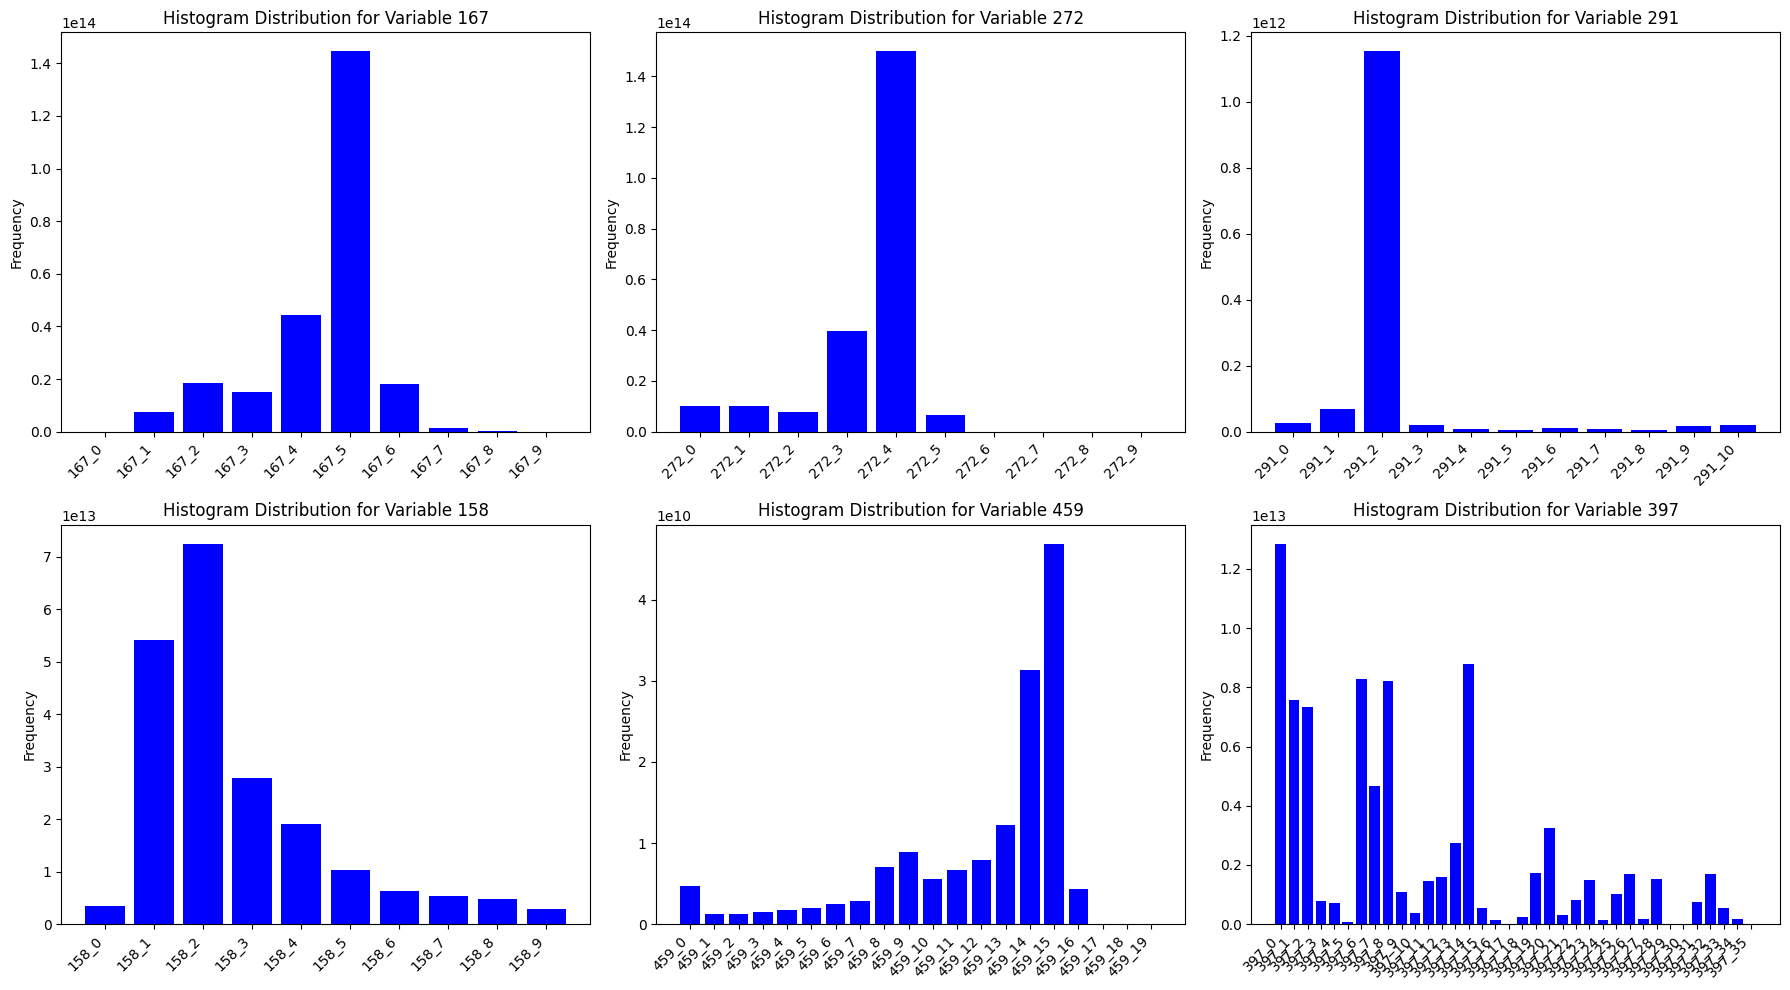

Analysis Complete! Consider further insights like clustering, anomaly detection, or predictive modeling.


In [6]:
# In summary, six out of 14 variables are organized into six histograms with variable IDs: "167", "272", "291", "158", "459",
# and "397," with 10, 10, 11, 10, 20, and 36 bins, respectively.
# Visualizing histogram-based features
histogram_features = {
    "167": 10, "272": 10, "291": 11, "158": 10, "459": 20, "397": 36
}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (var, bins) in enumerate(histogram_features.items()):
    hist_columns = [f"{var}_{i}" for i in range(bins) if f"{var}_{i}" in train_operational.columns]
    hist_data = train_operational[hist_columns].sum()
    
    axes[idx].bar(hist_columns, hist_data, color='blue')
    axes[idx].set_title(f"Histogram Distribution for Variable {var}")
    axes[idx].set_xticklabels(hist_columns, rotation=45, ha="right")
    axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

print("Analysis Complete! Consider further insights like clustering, anomaly detection, or predictive modeling.")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17696\1548993402.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(hist_columns, rotation=45, ha="right")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17696\1548993402.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(hist_columns, rotation=45, ha="right")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17696\1548993402.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(hist_columns, rotation=45, ha="right")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17696\1548993402.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xti

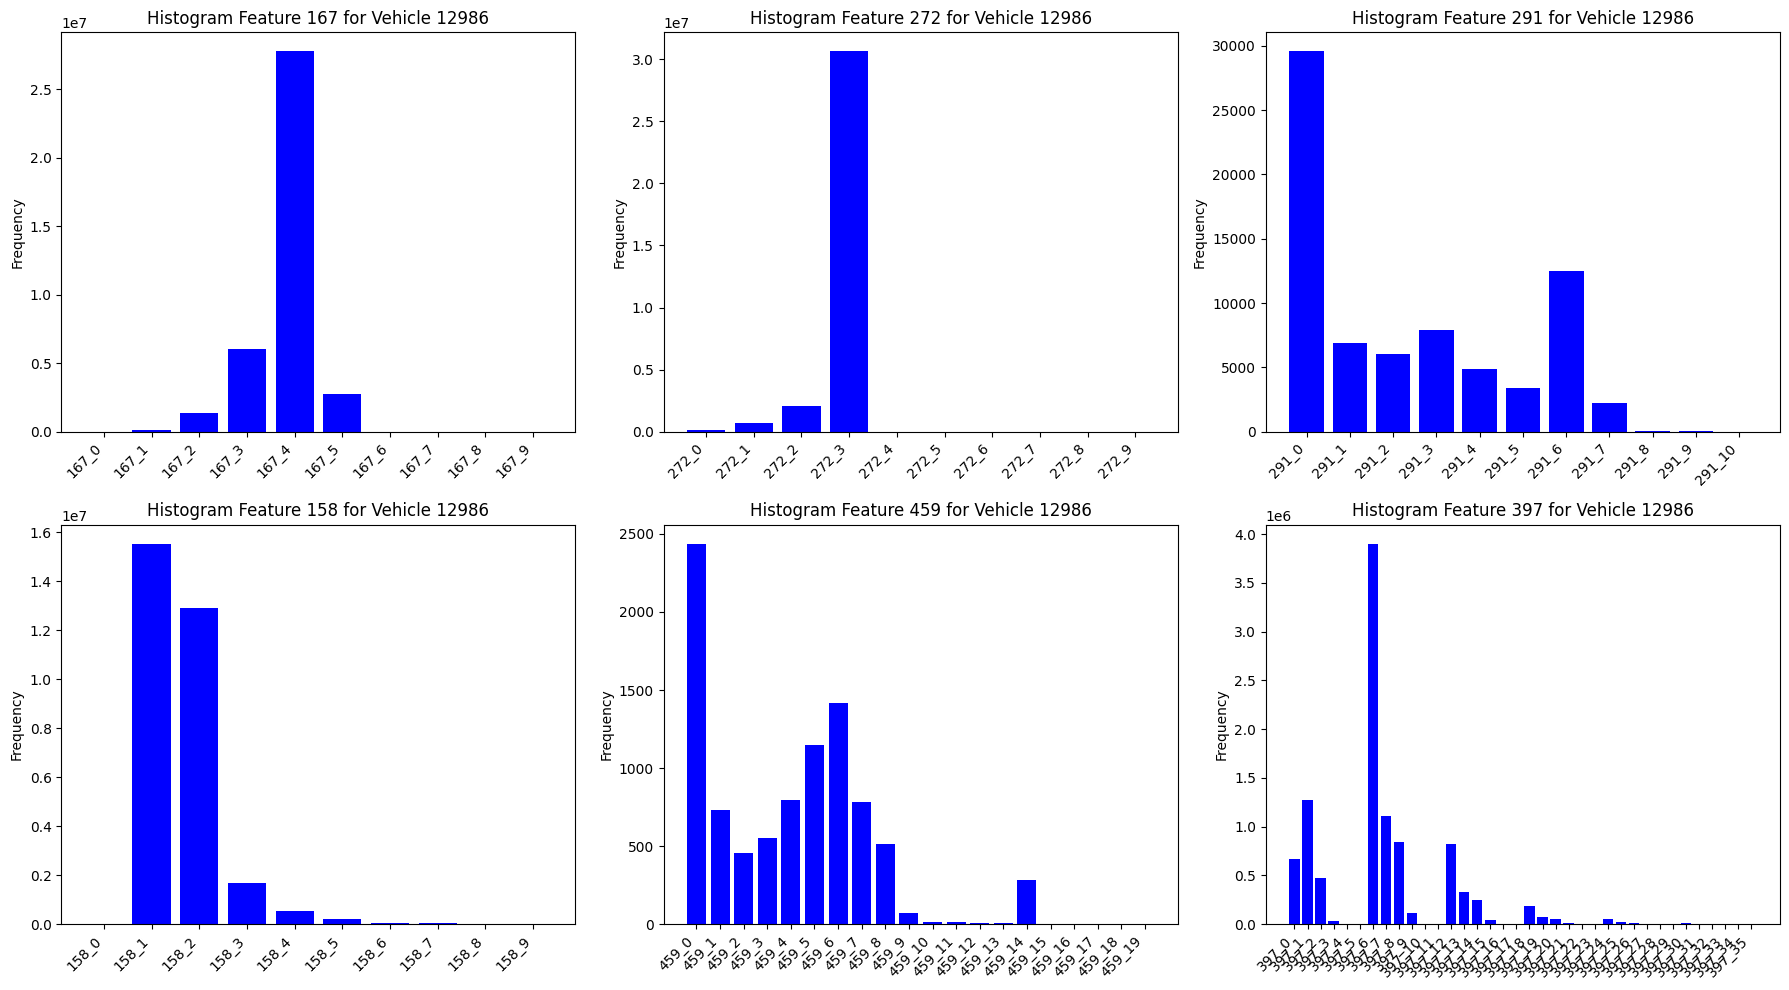

In [7]:
# Select a random vehicle
random_vehicle_id = train_operational['vehicle_id'].sample(1).values[0]
random_vehicle = train_operational[train_operational['vehicle_id'] == random_vehicle_id]

# Histogram-based features with their bin counts
histogram_features = {
    "167": 10, "272": 10, "291": 11, "158": 10, "459": 20, "397": 36
}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (var, bins) in enumerate(histogram_features.items()):
    hist_columns = [f"{var}_{i}" for i in range(bins) if f"{var}_{i}" in random_vehicle.columns]
    
    if hist_columns:
        hist_data = random_vehicle[hist_columns].iloc[0]  # Select first row for the vehicle
        
        axes[idx].bar(hist_columns, hist_data, color='blue')
        axes[idx].set_title(f"Histogram Feature {var} for Vehicle {random_vehicle_id}")
        axes[idx].set_xticklabels(hist_columns, rotation=45, ha="right")
        axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# NON- HISTOGRAM FEATURES

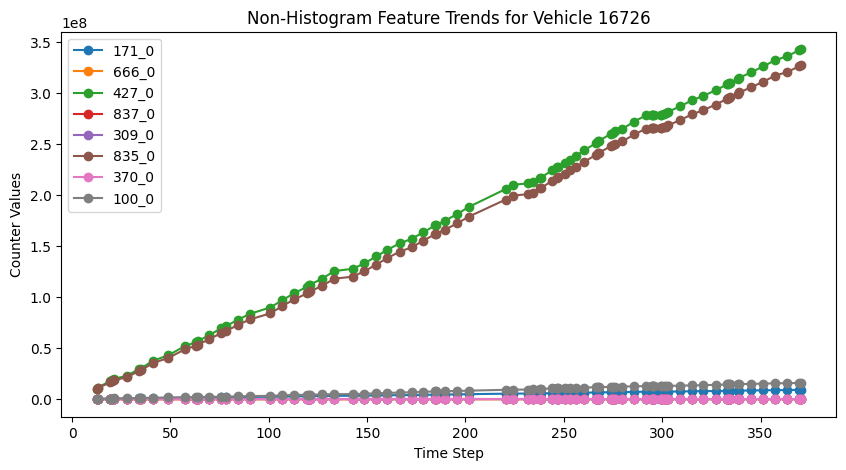

In [6]:
# Visualizing non-histogram variables for a random vehicle
random_vehicle_id = train_operational['vehicle_id'].sample(1).values[0]
random_vehicle = train_operational[train_operational['vehicle_id'] == random_vehicle_id]

target_counters = ["171_0", "666_0", "427_0", "837_0", "309_0", "835_0", "370_0", "100_0"]

plt.figure(figsize=(10, 5))
for counter in target_counters:
    if counter in random_vehicle.columns:
        plt.plot(random_vehicle["time_step"], random_vehicle[counter], marker='o', label=counter)

plt.xlabel("Time Step")
plt.ylabel("Counter Values")
plt.title(f"Non-Histogram Feature Trends for Vehicle {random_vehicle_id}")
plt.legend()
plt.show()


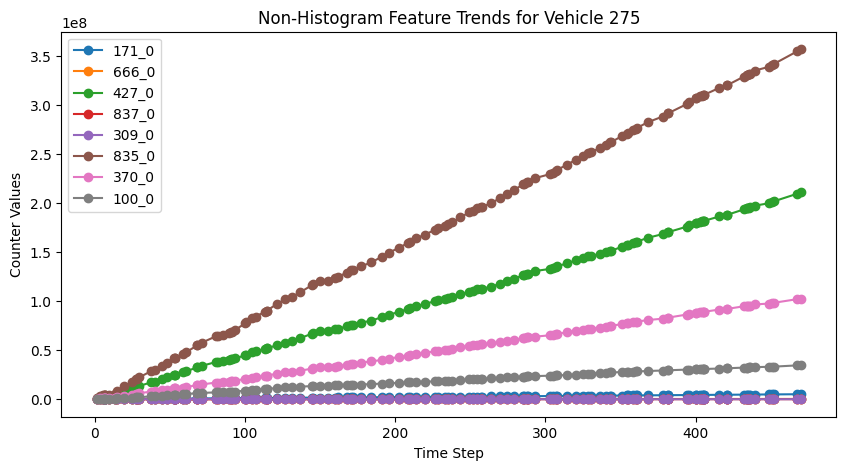

In [7]:
# Visualizing non-histogram variables for a random vehicle
random_vehicle_id = train_operational['vehicle_id'].sample(1).values[0]
random_vehicle = train_operational[train_operational['vehicle_id'] == random_vehicle_id]

plt.figure(figsize=(10, 5))
for counter in target_counters:
    if counter in random_vehicle.columns:
        plt.plot(random_vehicle["time_step"], random_vehicle[counter], marker='o', label=counter)

plt.xlabel("Time Step")
plt.ylabel("Counter Values")
plt.title(f"Non-Histogram Feature Trends for Vehicle {random_vehicle_id}")
plt.legend()
plt.show()


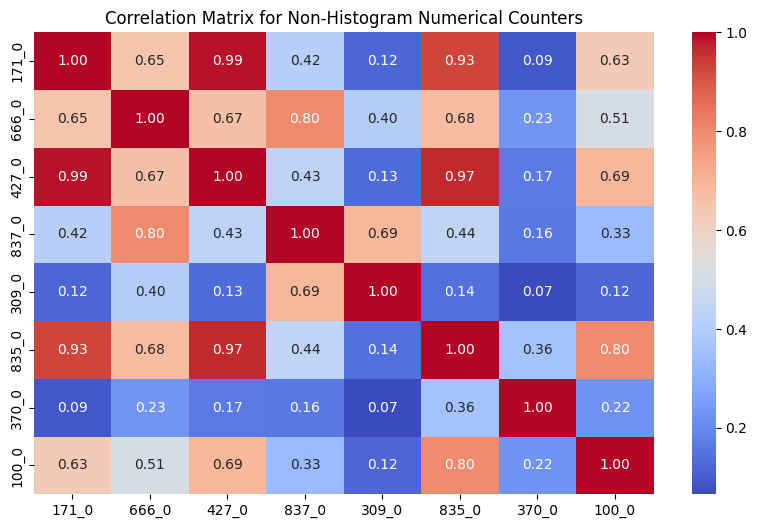

In [8]:
# Correlation matrix for non-histogram numerical counters
target_counters = ["171_0", "666_0", "427_0", "837_0", "309_0", "835_0", "370_0", "100_0"]

# Filter only the relevant columns
non_histogram_data = train_operational[target_counters].dropna()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(non_histogram_data.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix for Non-Histogram Numerical Counters")
plt.show()
